In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import DataSplitter

# Seasonality

In [2]:
def fourierTransform(seq):
    dft_seq = np.fft.fft(seq)
    return pd.Series(dft_seq)

def inverseFourierTransform(seq):
    idft_seq = np.fft.ifft(seq)
    return pd.Series(idft_seq)

In [7]:
np.set_printoptions(precision=2, suppress=True)
df = DataSplitter.getTrainData(60)

passengers = [df[(df["line"] == f"{i+1}A")]["passengersBoarding"].tolist() for i in range(6)]
passengers_ft = [fourierTransform(passenger_line) for passenger_line in passengers]
nsamples = len(passengers[0])
print('samples', nsamples)
#passengers_ft_real = [np.abs(passenger_line)[:(len(passenger_line) // 2)] for passenger_line in passengers_ft]

max_magnitude_of_passengers = []
for passenger_line in passengers_ft:
    max_magnitude_of_line = []
    norms = np.abs(passenger_line[:nsamples//2][1:])

    # pick the n largest but not DC
    amount_of_tops = 5
    max_index = np.argsort(norms)[-amount_of_tops::][::-1] + 1
    print(norms[max_index])
    # find the period
    print('periods in hours', 2*np.pi / (np.pi * max_index.values/(nsamples/2)))

    # 0-array except for largest magnitudes
    max_magnitude_of_line = np.zeros(nsamples)
    max_magnitude_of_line[max_index] = norms[max_index]

    # magnitude but where tops are set to 0
    #norms[max_index] = 0
    #max_magnitude_of_line = norms


    #max_val = max(norms)
    #max_magnitude_of_line.append(0)
    #for k, obs in enumerate(passenger_line[:nsamples//2][1:]):
    #    if not (k == 1368):#np.abs(obs) != max_val:
    #        max_magnitude_of_line.append(0)
    #    else:
    #        max_magnitude_of_line.append(obs)
    #        print('largest', k+1)
    max_magnitude_of_passengers.append(max_magnitude_of_line + max_magnitude_of_line[::-1])


samples 16896
704     2.873052e+06
2112    7.920580e+05
603     4.723707e+05
1       4.542849e+05
101     4.353370e+05
dtype: float64
periods in hours [   24.       8.      28.02 16896.     167.29]
704     2.823436e+06
2112    6.706268e+05
101     4.589710e+05
603     4.296320e+05
503     3.864583e+05
dtype: float64
periods in hours [ 24.     8.   167.29  28.02  33.59]
704     1.998845e+06
2112    5.072788e+05
101     3.214135e+05
603     2.986858e+05
503     2.690556e+05
dtype: float64
periods in hours [ 24.     8.   167.29  28.02  33.59]
704     3.324890e+06
2112    1.060658e+06
101     6.263748e+05
603     5.747988e+05
4224    5.249077e+05
dtype: float64
periods in hours [ 24.     8.   167.29  28.02   4.  ]
704     1.514199e+06
2112    5.754787e+05
101     3.484586e+05
201     3.145255e+05
4       2.971383e+05
dtype: float64
periods in hours [  24.      8.    167.29   84.06 4224.  ]
704     2.420263e+06
2112    1.291176e+06
2816    7.897743e+05
101     7.083569e+05
4224    5.939121e

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


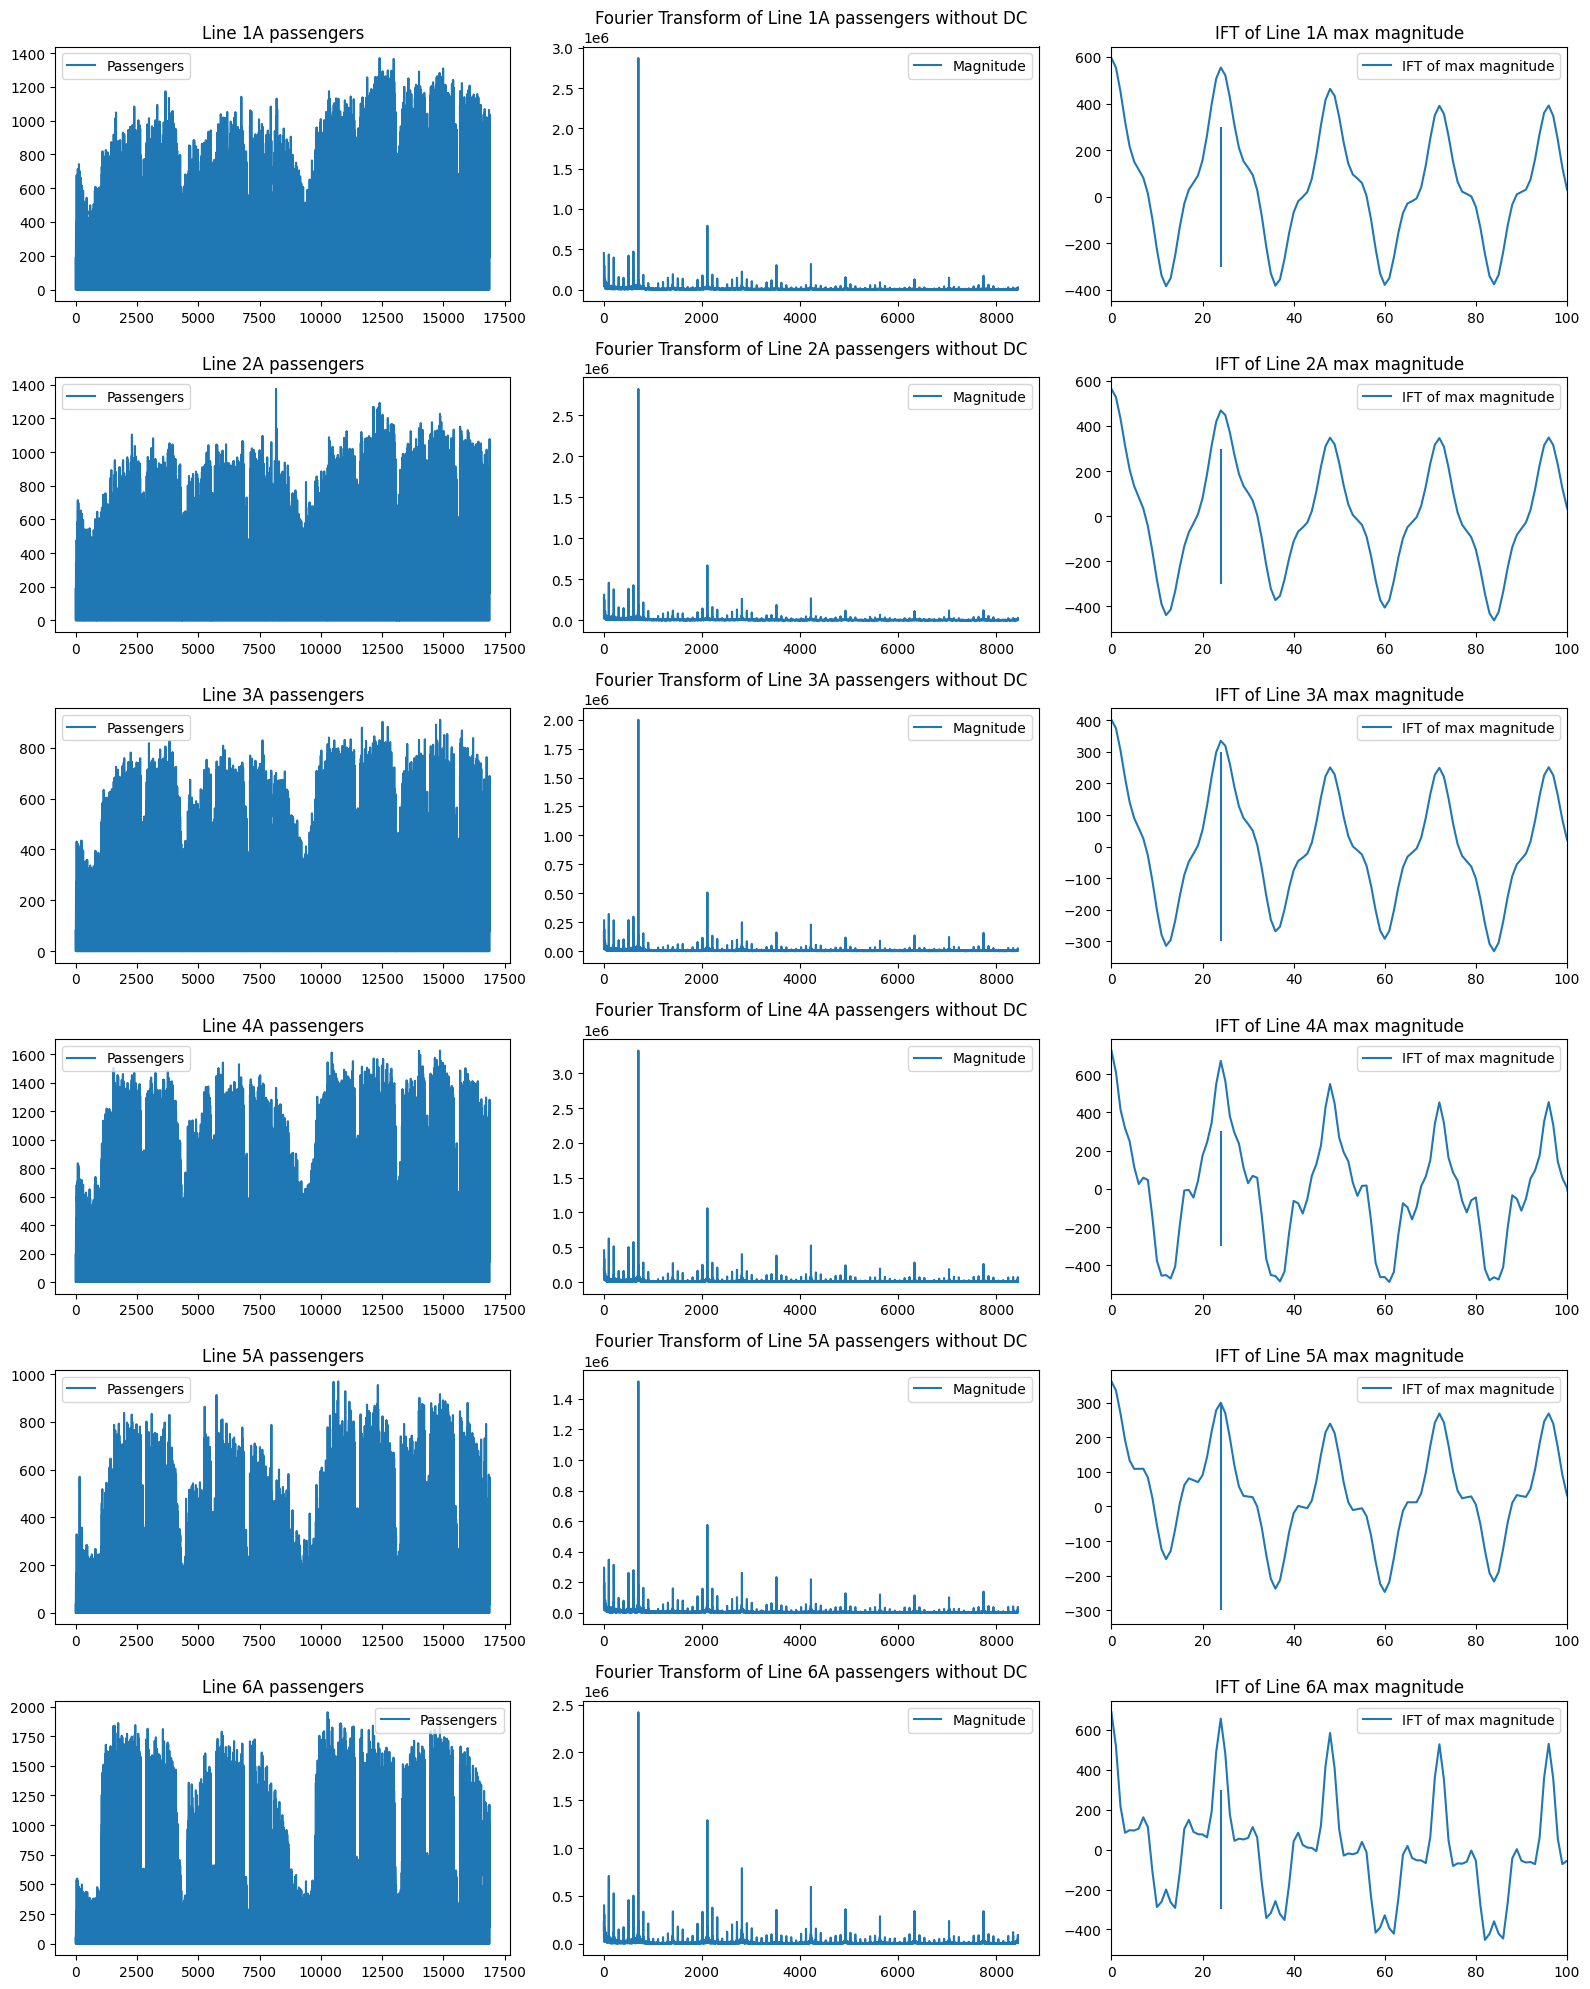

In [8]:
# Create a 3x4 grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 20))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot on each subplot
for i in range(0, 6):
    # plot passenger
    axes[i*3].plot(passengers[i], label=f"Passengers")
    axes[i*3].set_title(f"Line {i+1}A passengers")
    axes[i*3].legend()

    # plot frequency spectrum without DC
    mag = np.abs(passengers_ft[i][1:nsamples//2])
    axes[(i*3)+1].plot(mag, label=f"Magnitude")
    axes[(i*3)+1].set_title(f"Fourier Transform of Line {i+1}A passengers without DC")
    axes[(i*3)+1].legend()

    # plot inverse transform
    #axes[(i*3)+2].plot(inverseFourierTransform(max_magnitude_of_passengers[i][len(max_magnitude_of_passengers)//2:]), label=f"IFT of max magnitude")
    axes[(i*3)+2].plot(inverseFourierTransform(max_magnitude_of_passengers[i]), label=f"IFT of max magnitude")
    axes[(i*3)+2].set_title(f"IFT of Line {i+1}A max magnitude")
    axes[(i*3)+2].legend()
    axes[(i*3)+2].set_xlim([0, 100])
    axes[(i*3)+2].vlines(x=24, ymin=-300, ymax=300)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

# Trend

# Stationarity